In [25]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

Zadoff Chu Sequence (first 50): [1.0, 0.0, 0.9987764162142613, -0.049453719922738996, 0.9890057044881307, -0.14787736976946894, 0.9562645670201275, -0.2925031245334109, 0.8800926628551884, -0.47480196375801115, 0.737045181617364, -0.6758434731908173, 0.507123863869773, -0.8618731848095704, 0.18446463842775596, -0.9828391512194238, -0.2087181663233351, -0.9779758315248003, -0.6095788197507078, -0.7927254647804207, -0.9128734540932494, -0.4082426445287902, -0.9923607874151031, 0.12336963808359226, -0.7535362892301956, 0.657406313335358, -0.20871816632333423, 0.9779758315248005, 0.46388052024208914, 0.8858977722852275, 0.9406291296038435, 0.33943606252240754, 0.9024965190774263, -0.4306971477188219, 0.2806535185300929, -0.9598091490169693, -0.5696297258798568, -0.8219014389779588, -0.9996940572530831, -0.024734427279995825, -0.5696297258798574, 0.8219014389779583, 0.4195019832482285, 0.9077544194609041, 0.9987764162142612, 0.04945371992274049, 0.46388052024208903, -0.8858977722852275, -0.

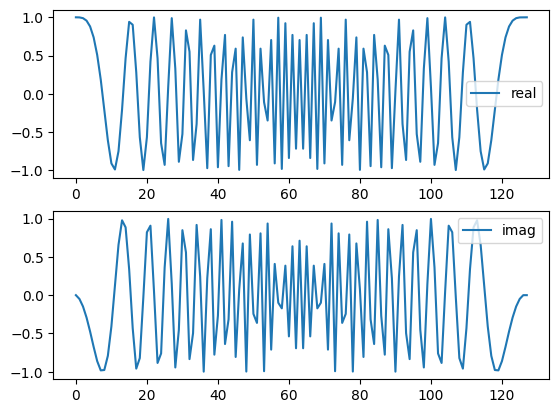

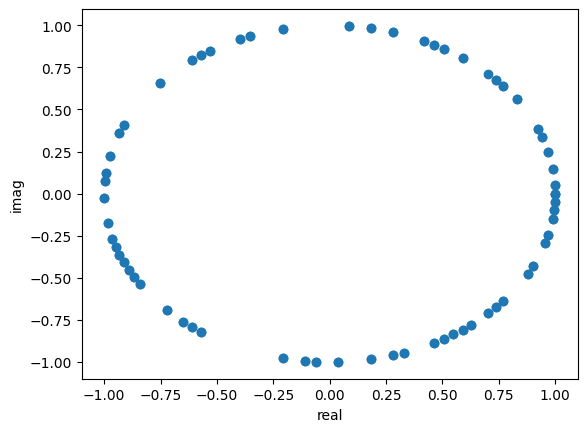

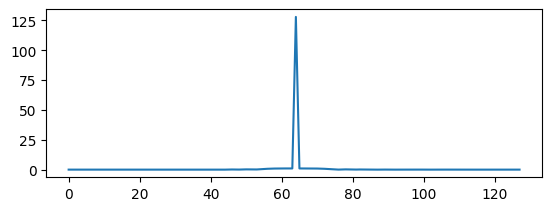

In [74]:
u = 1
N = 128
n = np.arange(N)
x = np.exp(-1j * np.pi*u*n*(n+1)/(N-1))

new_sequence = []
for ele_x in x:
    # print(ele_x)
    real_part = ele_x.real
    imag_part = ele_x.imag
    new_sequence.append(real_part)
    new_sequence.append(imag_part)

print("Zadoff Chu Sequence (first 50):", new_sequence[0:50])
plt.subplot(2,1,1)
plt.plot(np.real(x), label="real")
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.imag(x), label="imag")
plt.legend()
plt.show()
plt.scatter(np.real(x), np.imag(x))
plt.xlabel("real")
plt.ylabel("imag")
plt.show()

corr = np.fft.fftshift(np.fft.fft(x)) * np.conj(np.fft.fftshift(np.fft.fft(x)))
plt.subplot(2,1,1)
plt.plot(np.abs(np.fft.ifftshift(np.fft.ifft(corr))))


Transmitted sample length:  40940
Received sample length:  24536


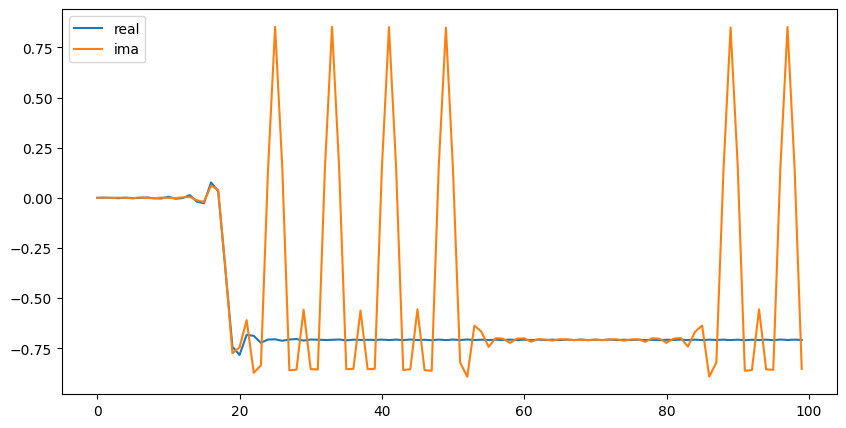

In [36]:
rec_signal = np.fromfile(open("re_data"), dtype=np.float32)
trans_signal = np.fromfile(open("data_qp_original"), dtype=np.float32)

print("Transmitted sample length: ", len(trans_signal))
print("Received sample length: ", len(rec_signal))
# 生成复数信号
even_rec = rec_signal[::2]
odd_rec = rec_signal[1::2]
complex_rec = even_rec + 1j*odd_rec

plt.figure(figsize=(10, 5))
plt.plot(even_rec[:100].real, label="real")
plt.plot(odd_rec[:100].real, label="ima")
plt.legend()

even_trans = trans_signal[::2]
odd_trans = trans_signal[1::2]
complex_trans = even_trans + 1j*odd_trans

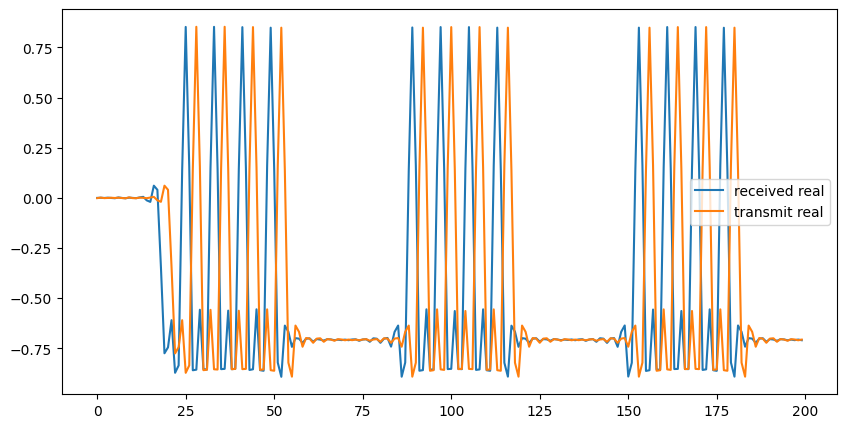

In [44]:
# 信号局部对比
plt.figure(figsize=(10, 5))
plt.plot((complex_rec[:200]).imag, label="received real")
plt.plot((complex_trans[:200]).imag, label="transmit real")
plt.legend()

In [45]:
# 将两个信号的长度调整为一致
e_idx = min(np.size(complex_rec,0), np.size(complex_trans,0))
complex_rec = complex_rec[:e_idx]
complex_trans = complex_trans[:e_idx]

g:\python37\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
g:\python37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Correlation of received signal and transmit signal')

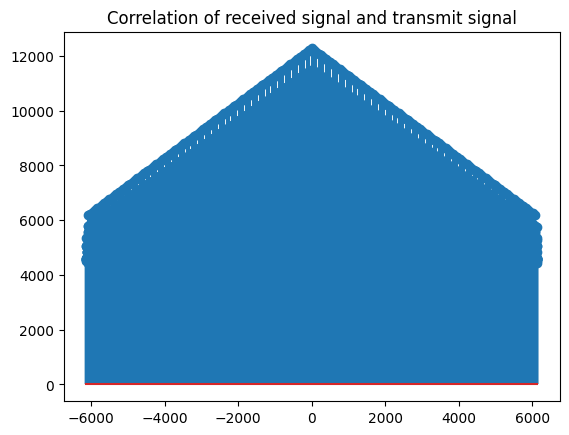

In [46]:
# 进行相关运算
corr_rec_trans = signal.correlate(complex_rec, complex_trans, 'same') # 生成相关系数
lags_rec_trans = signal.correlation_lags(complex_rec.size, complex_trans.size, 'same') # 生成lags，即生成一个(-N, N)的序列
plt.stem(lags_rec_trans, corr_rec_trans)
plt.title("Correlation of received signal and transmit signal")

In [47]:
offset = lags_rec_trans[np.argmax(abs(corr_rec_trans))] # 找到相关系数最大的位置, 即为偏移量, 也就是信号的延迟, corr(A,B), A向右移动offset个单位, 就能和B对齐
print(offset)

-3
